<a href="https://colab.research.google.com/github/skyanalyst/Machine-Learning-Projects/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [2]:
!pip install opendatasets scikit-learn --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 69.1 MB/s eta 0:00:00


In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

100%|██████████| 3.83M/3.83M [00:00<00:00, 195MB/s]

In [5]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [6]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [9]:
# training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [10]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [11]:
# Input and target column
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [12]:
# identify categorical and numeric column
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [13]:
# Impute missing numeric column
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [15]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [16]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [17]:
# Scaling numeric features
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [19]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [20]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [21]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder

In [22]:
train_df[categorical_cols].isna().sum()

Location          0
WindGustDir    6943
WindDir9am     7323
WindDir3pm     2030
RainToday      1000
dtype: int64

In [23]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('unknown')

In [24]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [26]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [27]:
# Final datasets
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [28]:
# Training and visualisng decision trees
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier(random_state=42)

In [30]:
%%time
model.fit(X_train, train_targets)

CPU times: user 3.67 s, sys: 25.3 ms, total: 3.7 s
Wall time: 3.8 s


DecisionTreeClassifier(random_state=42)

In [31]:
# Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
train_preds = model.predict(X_train)

In [33]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [34]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [35]:
train_probs = model.predict_proba(X_train)

In [36]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [37]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [38]:
model.score(X_val, val_targets)

0.791654576054785

In [39]:
val_targets.value_counts() / len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

In [40]:
# Visualize decision tree
from sklearn.tree import plot_tree, export_text

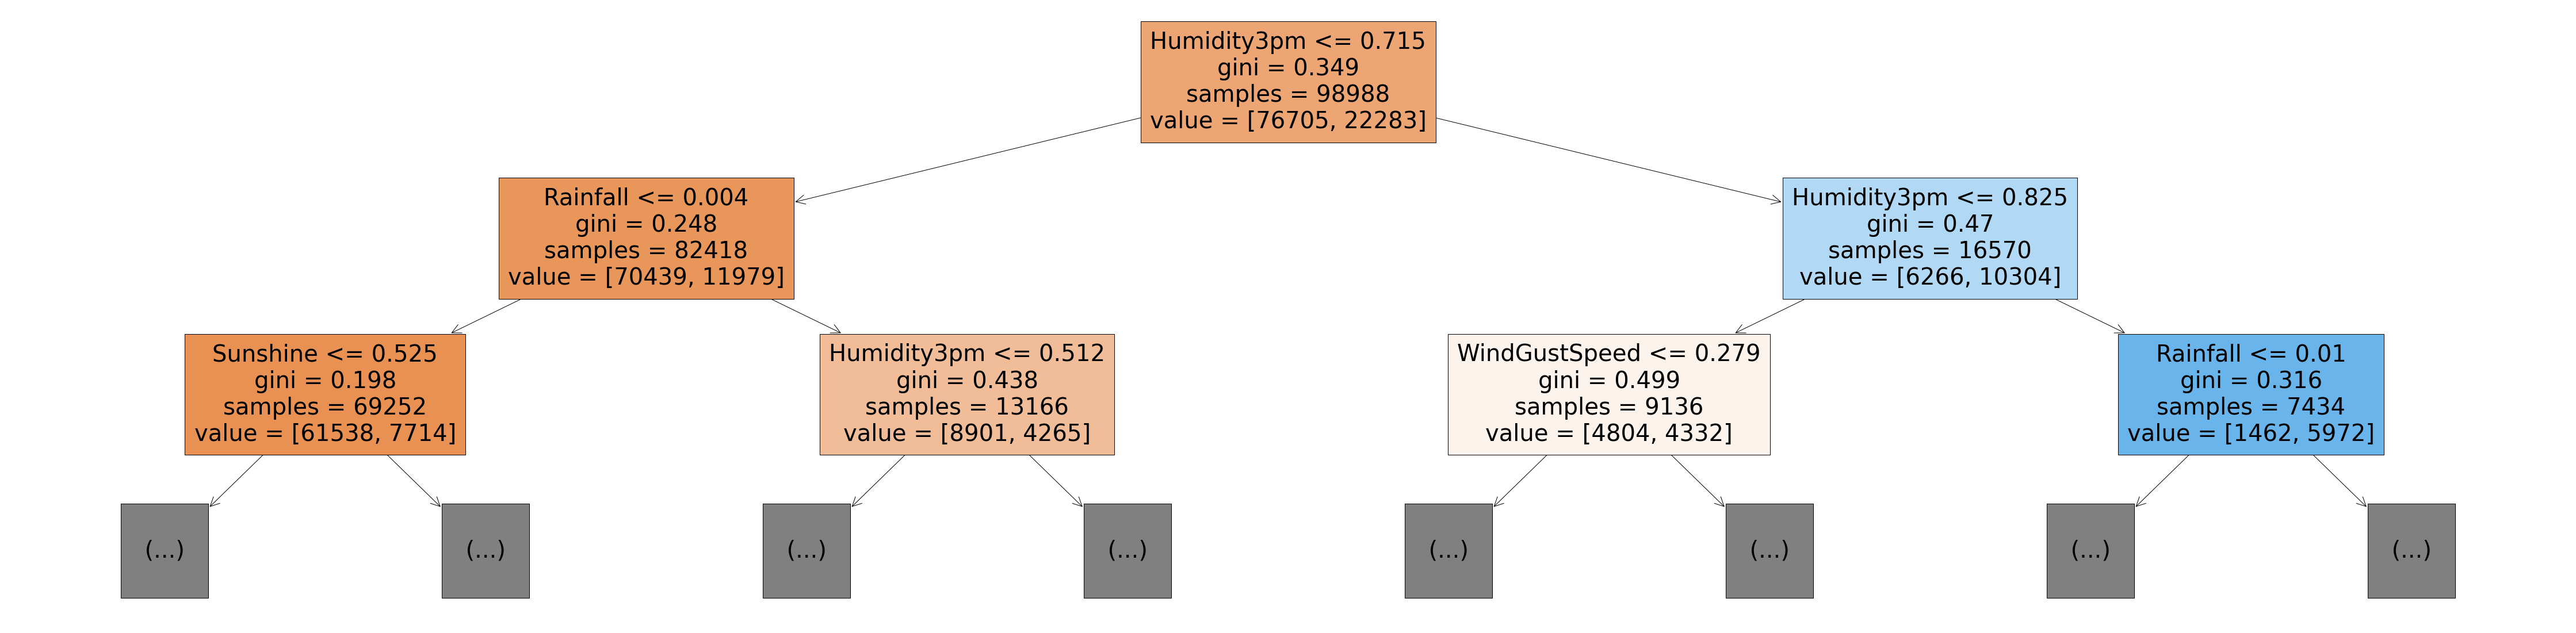

In [41]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [42]:
model.tree_.max_depth

48

In [43]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [46]:
# Feature Importance
model.feature_importances_

array([0.03450243, 0.0326979 , 0.0588707 , 0.02398851, 0.04973483,
       0.05536477, 0.02888049, 0.02916332, 0.03948956, 0.26258596,
       0.03464976, 0.06252979, 0.01335156, 0.01832233, 0.03344341,
       0.03103312, 0.00229202, 0.00242598, 0.00137905, 0.00072507,
       0.00153394, 0.00118986, 0.00076956, 0.0015545 , 0.00107346,
       0.00141115, 0.00107036, 0.00196324, 0.00181935, 0.00034969,
       0.00100552, 0.00155723, 0.00046338, 0.00101511, 0.00169162,
       0.00084242, 0.00105612, 0.00086093, 0.00168535, 0.00187041,
       0.00051907, 0.00047732, 0.00149774, 0.00154991, 0.00137383,
       0.00122996, 0.00074085, 0.00140641, 0.0010652 , 0.0021117 ,
       0.00070719, 0.00175523, 0.00097529, 0.00137448, 0.00116001,
       0.00042945, 0.00151262, 0.00034984, 0.00081469, 0.00148406,
       0.00152123, 0.00148832, 0.00265512, 0.0019318 , 0.00033358,
       0.0014037 , 0.00150786, 0.00207691, 0.00347399, 0.00252085,
       0.00225861, 0.00221304, 0.00333089, 0.00219937, 0.00302

In [47]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [48]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.262586
11,Pressure3pm,0.062530
2,Rainfall,0.058871
5,WindGustSpeed,0.055365
4,Sunshine,0.049735
8,Humidity9am,0.039490
10,Pressure9am,0.034650
0,MinTemp,0.034502
14,Temp9am,0.033443
1,MaxTemp,0.032698


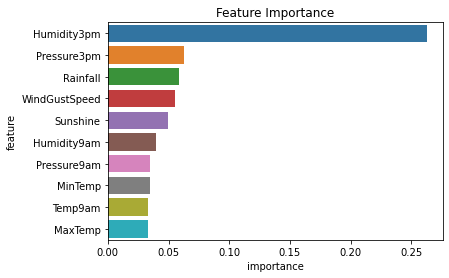

In [49]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [50]:
# Hyperparameter tuning and overfitting
?DecisionTreeClassifier

In [51]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [53]:
model.score(X_train, train_targets)

0.8291308037337859

In [54]:
model.score(X_val, val_targets)

0.8334397307178921

In [55]:
model.classes_

array(['No', 'Yes'], dtype=object)

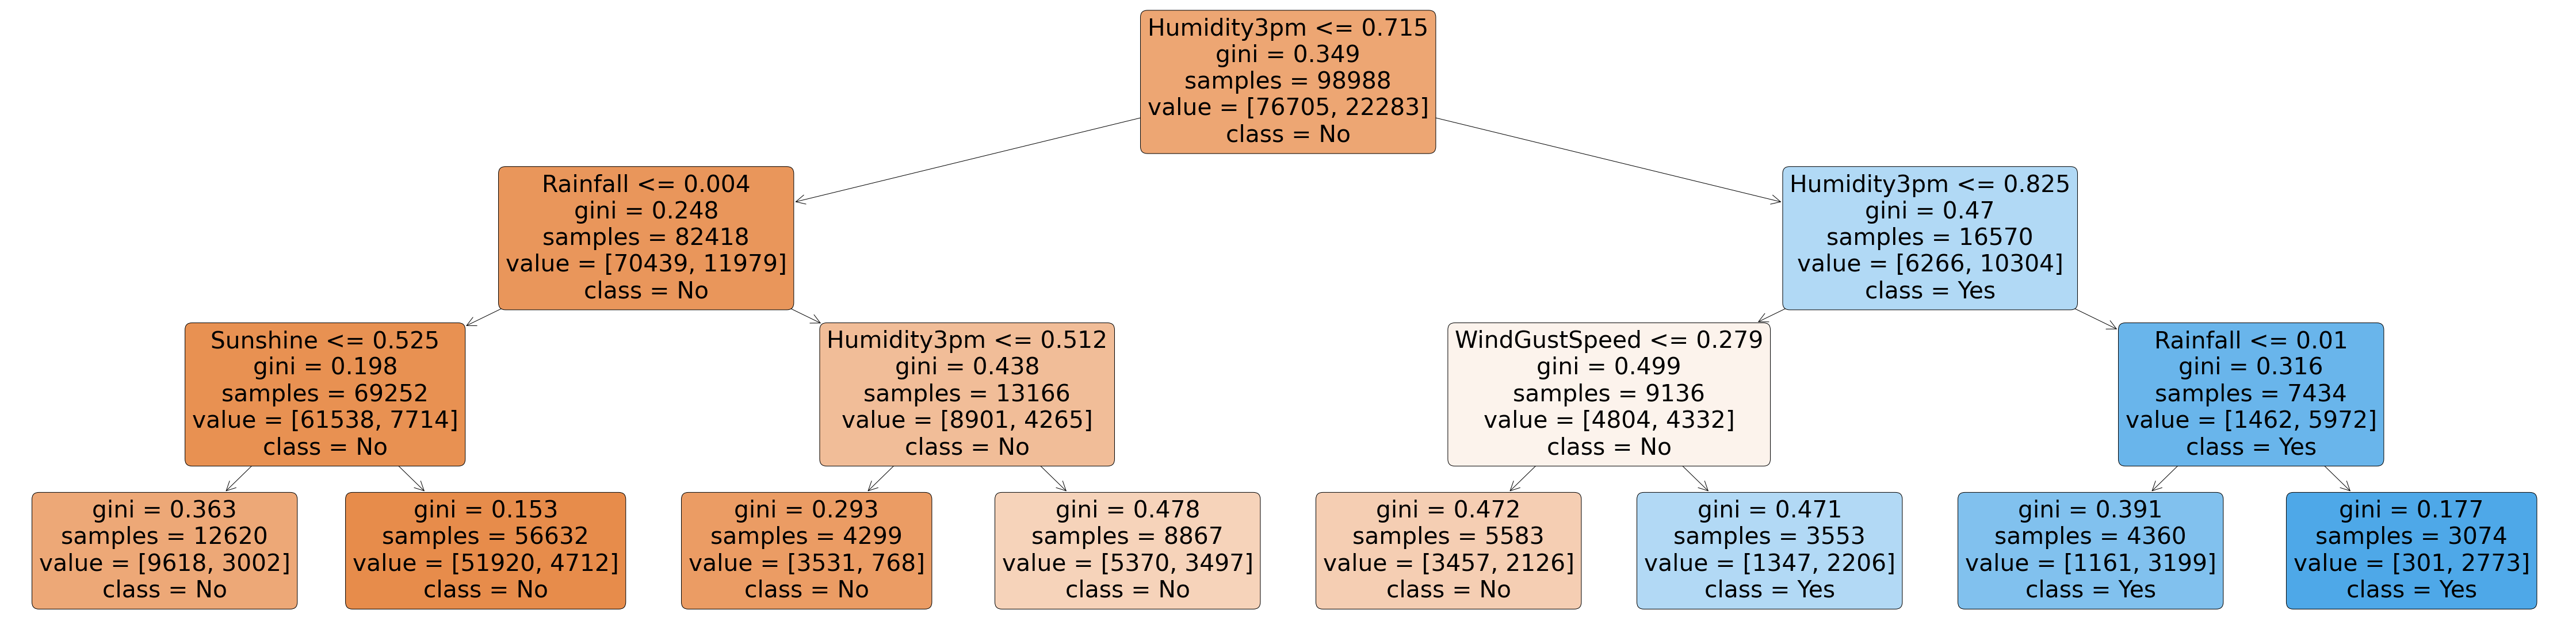

In [56]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [57]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [58]:
# helper function
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [59]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 44 s, sys: 460 ms, total: 44.5 s
Wall time: 48.9 s


In [60]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147644,0.157797
8,9,0.140724,0.156346
9,10,0.132703,0.158319


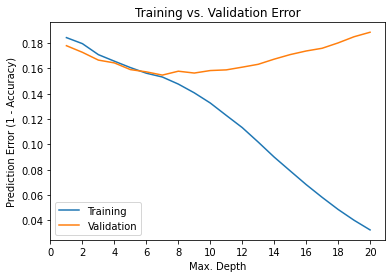

In [61]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [62]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8452788578724392

In [63]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [64]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [65]:
model.score(X_train, train_targets)

0.8480421869317493

In [66]:
model.score(X_val, val_targets)

0.8442342290058615

In [67]:
def max_leaf_nodes_error(md):
    model = DecisionTreeClassifier(max_leaf_nodes=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max leaf nodes': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [69]:
%%time
leaf_errors_df = pd.DataFrame([max_leaf_nodes_error(md) for md in range(2, 200)])
leaf_errors_df.head(20)

CPU times: user 5min 58s, sys: 4.44 s, total: 6min 2s
Wall time: 6min 14s


,Max leaf nodes,Training Error,Validation Error
0,2,0.184315,0.177935
1,3,0.184315,0.177935
2,4,0.179547,0.172712
3,5,0.179547,0.172712
4,6,0.179547,0.172712
...,...,...,...
193,195,0.146088,0.155418
194,196,0.145977,0.155650
195,197,0.145977,0.155650
196,198,0.145977,0.155650


In [70]:
leaf_errors_df.tail(20)

,Max leaf nodes,Training Error,Validation Error
178,180,0.147493,0.155243
179,181,0.147311,0.155243
180,182,0.147119,0.155360
181,183,0.147119,0.155360
182,184,0.146998,0.155301
183,185,0.146907,0.155301
184,186,0.146846,0.155301
185,187,0.146806,0.155360
186,188,0.146806,0.155360
187,189,0.146695,0.155476


# Training a Random forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [73]:
%%time
model.fit(X_train, train_targets)

CPU times: user 37.6 s, sys: 195 ms, total: 37.8 s
Wall time: 25.1 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [74]:
model.score(X_train, train_targets)

0.9999595910615429

In [75]:
model.score(X_val, val_targets)

0.8553769369160235

In [76]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.92, 0.08],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.93, 0.07]])

We can can access individual decision trees using `model.estimators_`

In [77]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

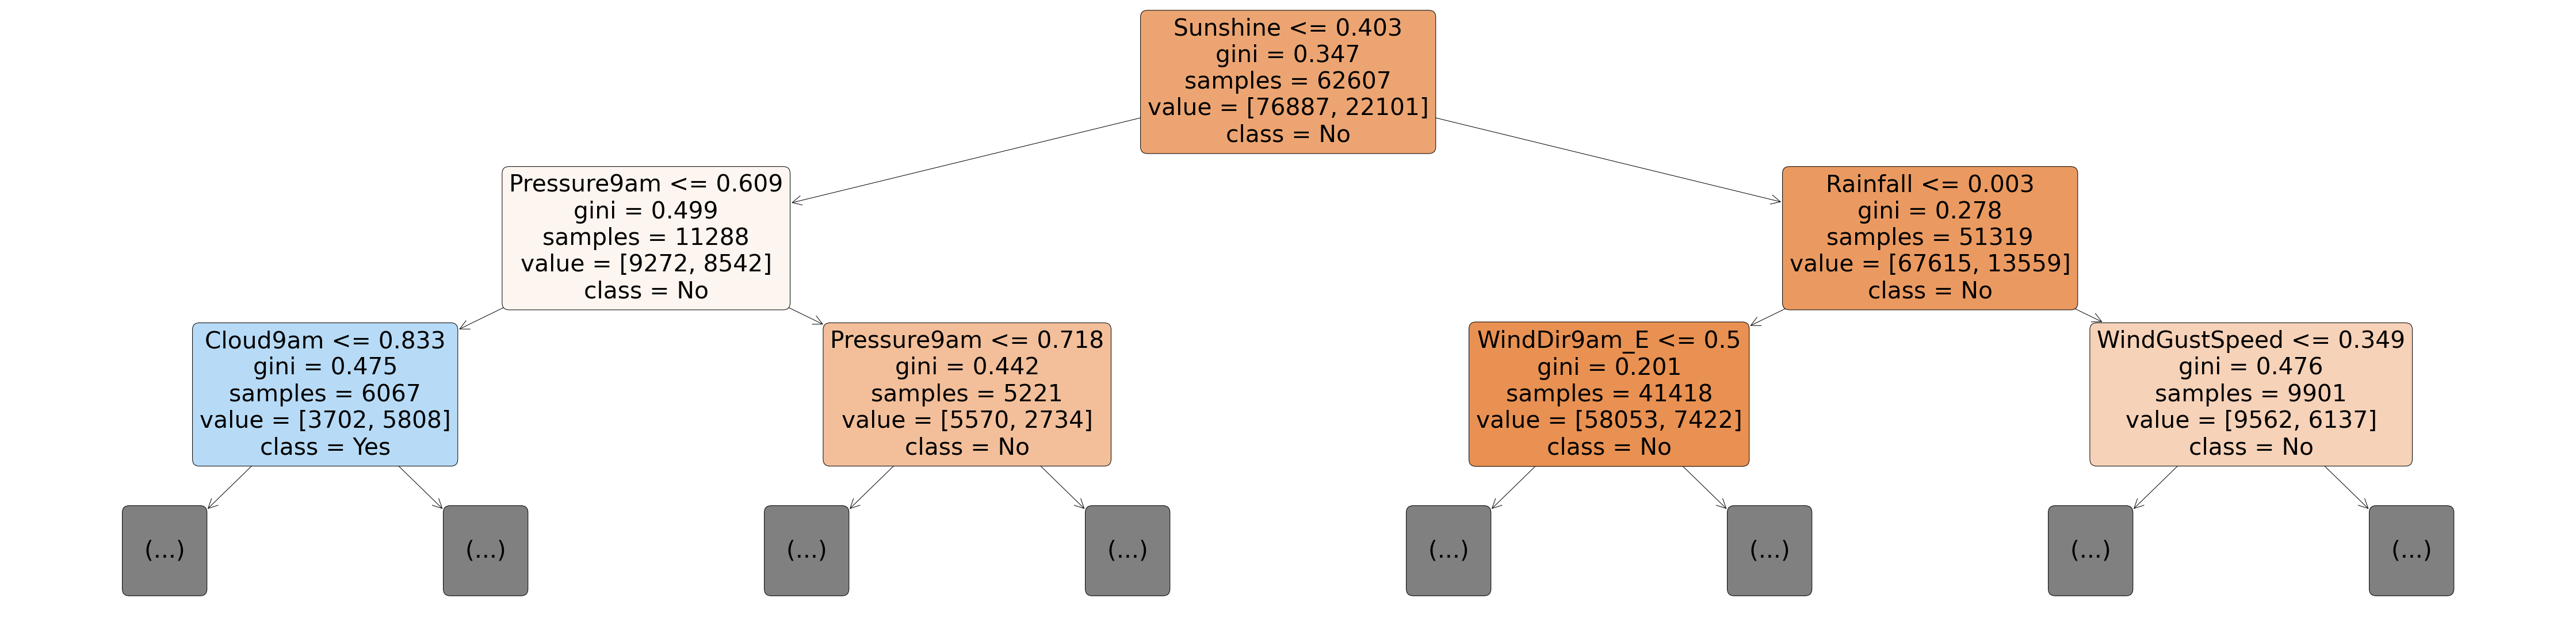

In [78]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

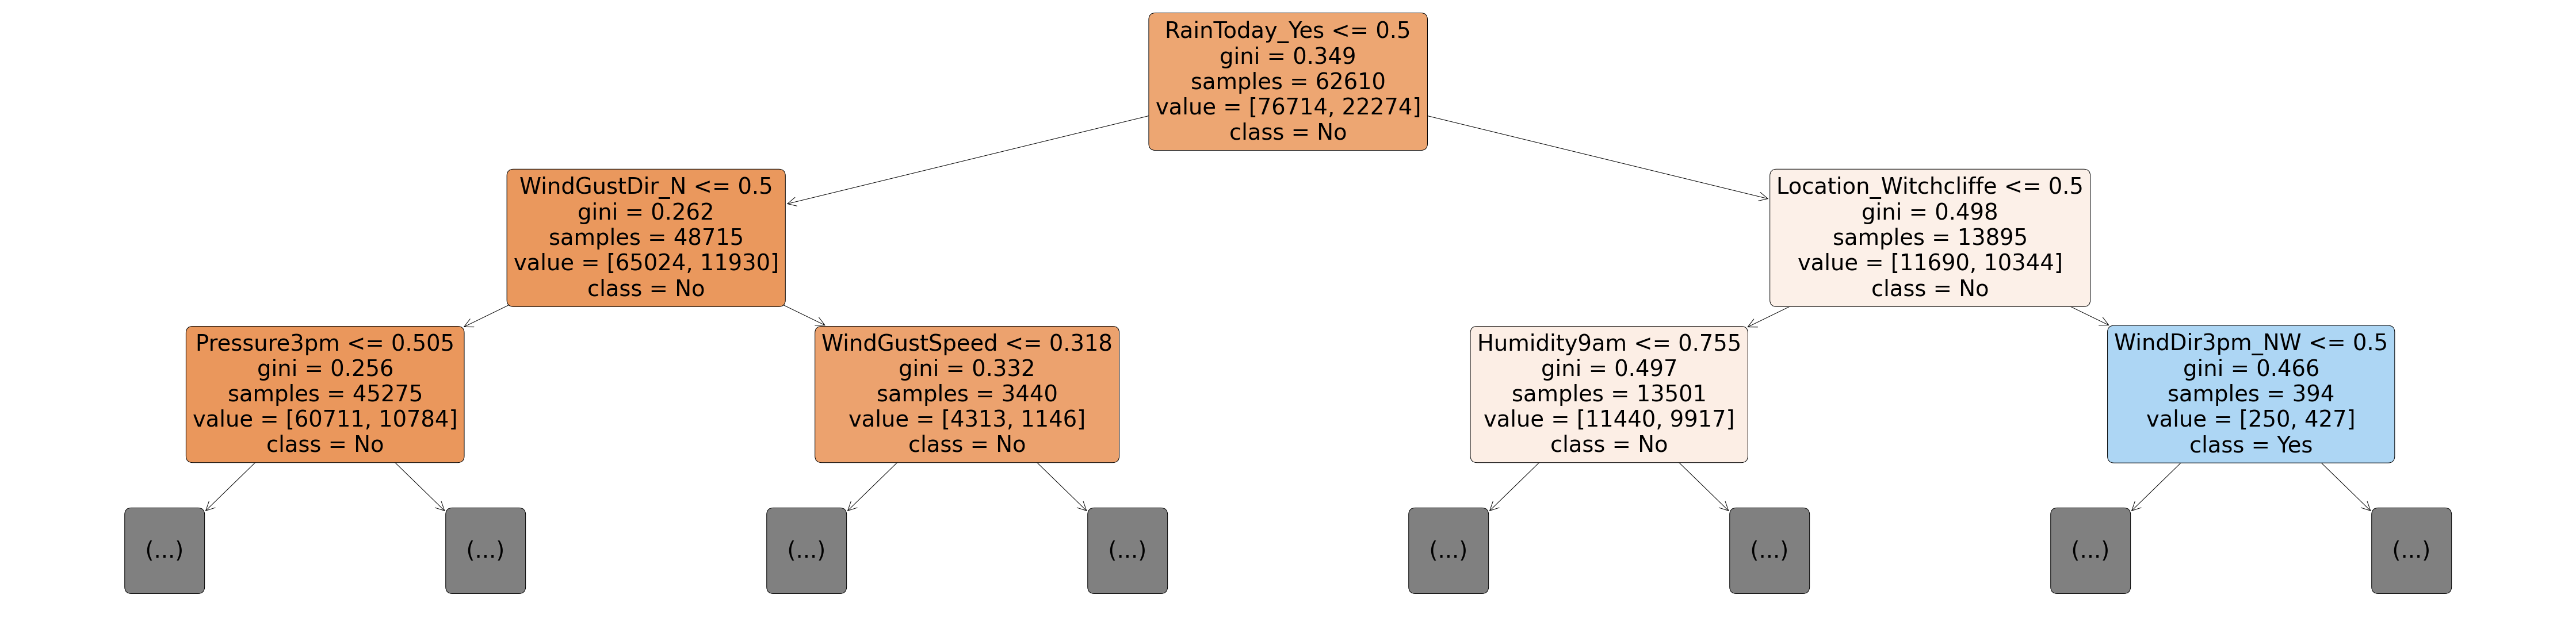

In [79]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [80]:
len(model.estimators_)

100

In [81]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [82]:
importance_df.head(20)

,feature,importance
9,Humidity3pm,0.139391
4,Sunshine,0.055504
11,Pressure3pm,0.054219
8,Humidity9am,0.050754
10,Pressure9am,0.048210
5,WindGustSpeed,0.047833
2,Rainfall,0.047278
15,Temp3pm,0.045182
1,MaxTemp,0.041811
0,MinTemp,0.041537


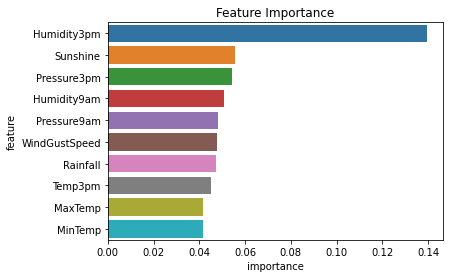

In [83]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [84]:
# Hyperparameter tuning with random forest


base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [85]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [86]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8553769369160235)

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**10 estimators**

In [87]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [88]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [89]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9872105709783005, 0.8467297312982416)

In [90]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [91]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [92]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8566537055307295)

In [93]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [94]:
# helper function
def n_estimator_error(md):
    model = RandomForestClassifier(n_estimators=md, random_state=42, n_jobs=-1)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [95]:
%%time
leaf_errors_df = pd.DataFrame([n_estimator_error(md) for md in range(2, 200)])
leaf_errors_df.head(20)

CPU times: user 2h 19min 1s, sys: 29.2 s, total: 2h 19min 30s
Wall time: 1h 21min 9s


,Max Depth,Training Error,Validation Error
0,2,0.076130,0.182752
1,3,0.035388,0.176310
2,4,0.040732,0.167779
3,5,0.021316,0.163891
4,6,0.025781,0.159654
5,7,0.013870,0.158087
6,8,0.017871,0.157391
7,9,0.009900,0.154779
8,10,0.012789,0.153270
9,11,0.007284,0.151181
